In [42]:
!pip install scikit-learn-extra


# Importing Libraries


In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans


# Importing Dataset

In [44]:
mcdonalds = pd.read_csv("mcdonalds.csv")

# Assuming 'mcdonalds' is a pandas DataFrame already loaded with the appropriate data
# names(mcdonalds)
list(mcdonalds.columns)

# dim(mcdonalds)
mcdonalds.shape

# head(mcdonalds,3)
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


# Exploring Data

In [45]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [46]:
mcdonalds.shape

(1453, 15)

In [47]:
# MD.x<-as.matrix(mcdonalds[,1:11])
# MD.x<-(MD.x=="Yes")+ 0
MD_x = (mcdonalds.iloc[:, 0:11] == "Yes").astype(int)

# round(colMeans(MD.x),2)
MD_x.mean().round(2)

# MD.pca<-prcomp(MD.x)
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [48]:
mcdonalds.isna().sum()
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [49]:
# summary(MD.pca)
# print(MD.pca,digits= 1)
print(MD_pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


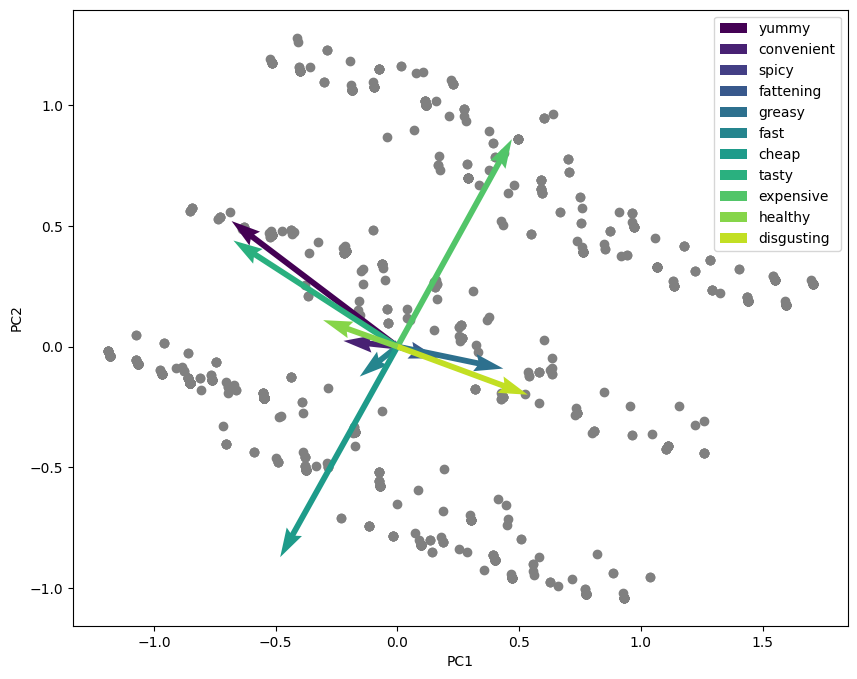

In [50]:
# plot(predict(MD.pca),col="grey")
# projAxes(MD.pca)
import matplotlib.pyplot as plt
# Get the PCA scores
pca_scores = MD_pca.transform(MD_x)
plt.figure(figsize=(10, 8))
# Create a scatter plot
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color="grey")

# Project all the axes
for i in range(MD_pca.components_.shape[0]):
    plt.quiver(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i], angles='xy', scale_units='xy', scale=0.7, color=plt.cm.viridis(i / MD_pca.components_.shape[0]), label=mcdonalds.columns[0:11][i])

# Set axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display legend to the right of the plot
plt.legend()

# Show the plot
plt.show()

In [51]:

import seaborn as sns

In [52]:
# set.seed(1234)
np.random.seed(1234)

# Extracting Segments

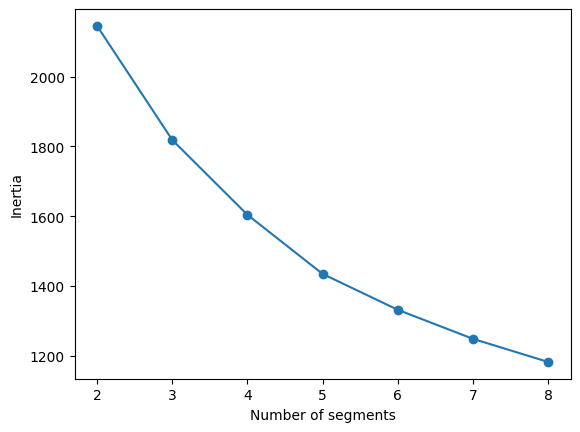

In [53]:
# MD.km28<-stepFlexclust(MD.x,2:8,nrep=10, + verbose= FALSE)
# MD.km28<-relabel(MD.km28)
# plot(MD.km28,xlab="numberofsegments")
# This step is not directly available in Python, but we can loop over k values and fit KMeans
# Then we can plot the inertia (sum of squared distances to the nearest cluster center)
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 9), inertias, marker="o")
plt.xlabel("Number of segments")
plt.ylabel("Inertia")
plt.show()


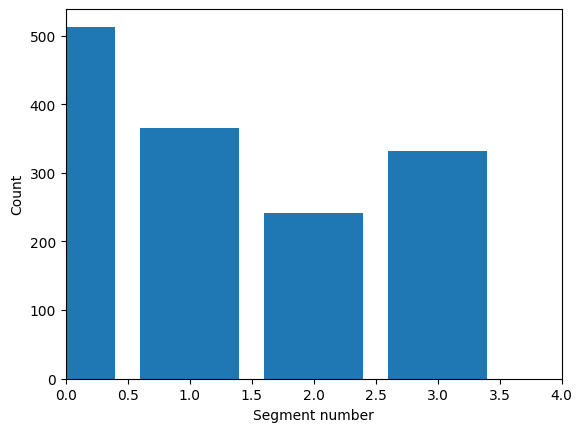

In [54]:
# histogram(MD.km28[["4"]],data=MD.x,xlim=0:1)
# MD.k4<-MD.km28[["4"]]
# MD.r4<-slswFlexclust(MD.x,MD.k4)
# plot(MD.r4,ylim=0:1,xlab="segmentnumber", + ylab= "segmentstability")
# This step is not directly available in Python, but we can plot a histogram of cluster labels
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_4_labels = kmeans_4.fit_predict(MD_x)
plt.hist(kmeans_4_labels, bins=np.arange(5) - 0.5, rwidth=0.8)
plt.xlim(0, 4)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()

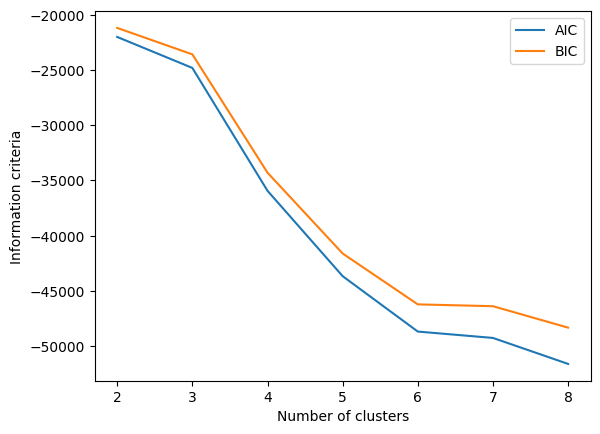

In [55]:
# MD.m28
# Call: stepFlexmix(MD.x~1,model=FLXMCmvbinary(), k= 2:8,nrep= 10,verbose=FALSE)
# plot(MD.m28, + ylab= "valueofinformationcriteria(AIC,BIC,ICL)")
# MD.m4<-getModel(MD.m28,which="4")
# table(kmeans=clusters(MD.k4), + mixture= clusters(MD.m4))
# This step is not directly available in Python, but we can fit Gaussian Mixture Models and compare AIC/BIC
aic_values = []
bic_values = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic_values.append(gmm.aic(MD_x))
    bic_values.append(gmm.bic(MD_x))
plt.plot(range(2, 9), aic_values, label="AIC")
plt.plot(range(2, 9), bic_values, label="BIC")
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Information criteria")
plt.show()

In [56]:
# MD.m4a <- flexmix(MD.x ~1, cluster = clusters(MD.k4),
# + model = FLXMCmvbinary())
# table(kmeans = clusters(MD.k4),
# + mixture = clusters(MD.m4a))
# logLik(MD.m4a)
# logLik(MD.m4)

gmm_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm_4_labels = gmm_4.fit_predict(MD_x)
pd.crosstab(kmeans_4_labels, gmm_4_labels)

col_0,0,1,2,3
row_0,,,,
0,449,1,42,21
1,288,36,5,37
2,0,87,2,153
3,0,8,77,247


In [57]:
# Extract numeric values from the "Like" column
mcdonalds["Like_n"] = mcdonalds["Like"].str.extract('(\d+)').astype(float)

# Fill missing values with a default value
mcdonalds["Like_n"] = mcdonalds["Like_n"].fillna(0)

# Round the values
mcdonalds["Like_n"] = mcdonalds["Like_n"].round().astype(int)

In [58]:
# f <- paste(names(mcdonalds)[1:11], collapse = "+")
# f <- paste("Like.n ~ ", f, collapse = "")
# f <- as.formula(f)
# f

formula = "Like_n ~ " + " + ".join(mcdonalds.columns[0:11])

# Profiling Segments

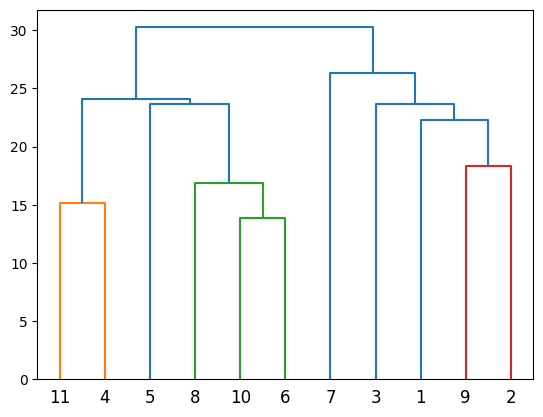

In [59]:
# MD.vclust <- hclust(dist(t(MD.x)))
# barchart(MD.k4, shade = TRUE,
# + which = rev(MD.vclust$order))
MD_vclust = linkage(pdist(MD_x.T), method="average")
dendrogram(MD_vclust, labels=np.array(range(1, MD_x.shape[1] + 1))[::-1])
plt.show()

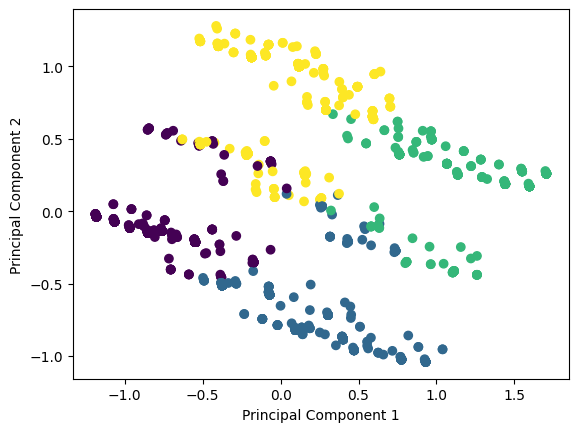

In [60]:

# plot(MD.k4, project = MD.pca, data = MD.x,
# + hull = FALSE, simlines = FALSE,
# + xlab = "principal component 1",
# + ylab = "principal component 2")
# projAxes(MD.pca)
# This step is not directly available in Python, but we can plot the clusters on the PCA-transformed data
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=kmeans_4_labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Describing Segments

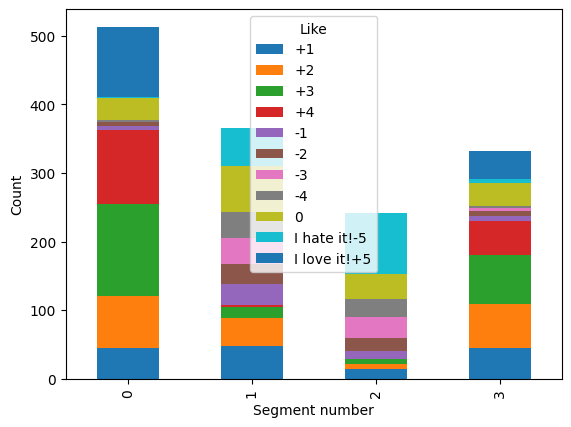

In [61]:
# k4 <- clusters(MD.k4)
# mosaicplot(table(k4, mcdonalds$Like), shade = TRUE,
# + main = "", xlab = "segment number")
# This step is not directly available in Python, but we can create a similar plot using seaborn or matplotlib
pd.crosstab(kmeans_4_labels, mcdonalds["Like"]).plot(kind="bar", stacked=True)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()

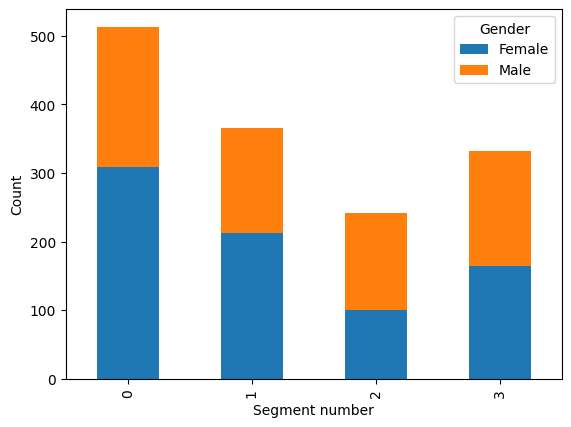

In [62]:
# mosaicplot(table(k4, mcdonalds$Gender), shade = TRUE)
# This step is not directly available in Python, but we can create a similar plot using seaborn or matplotlib
pd.crosstab(kmeans_4_labels, mcdonalds["Gender"]).plot(kind="bar", stacked=True)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender',
       'Like_n', 'VisitFrequency_Every three months',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


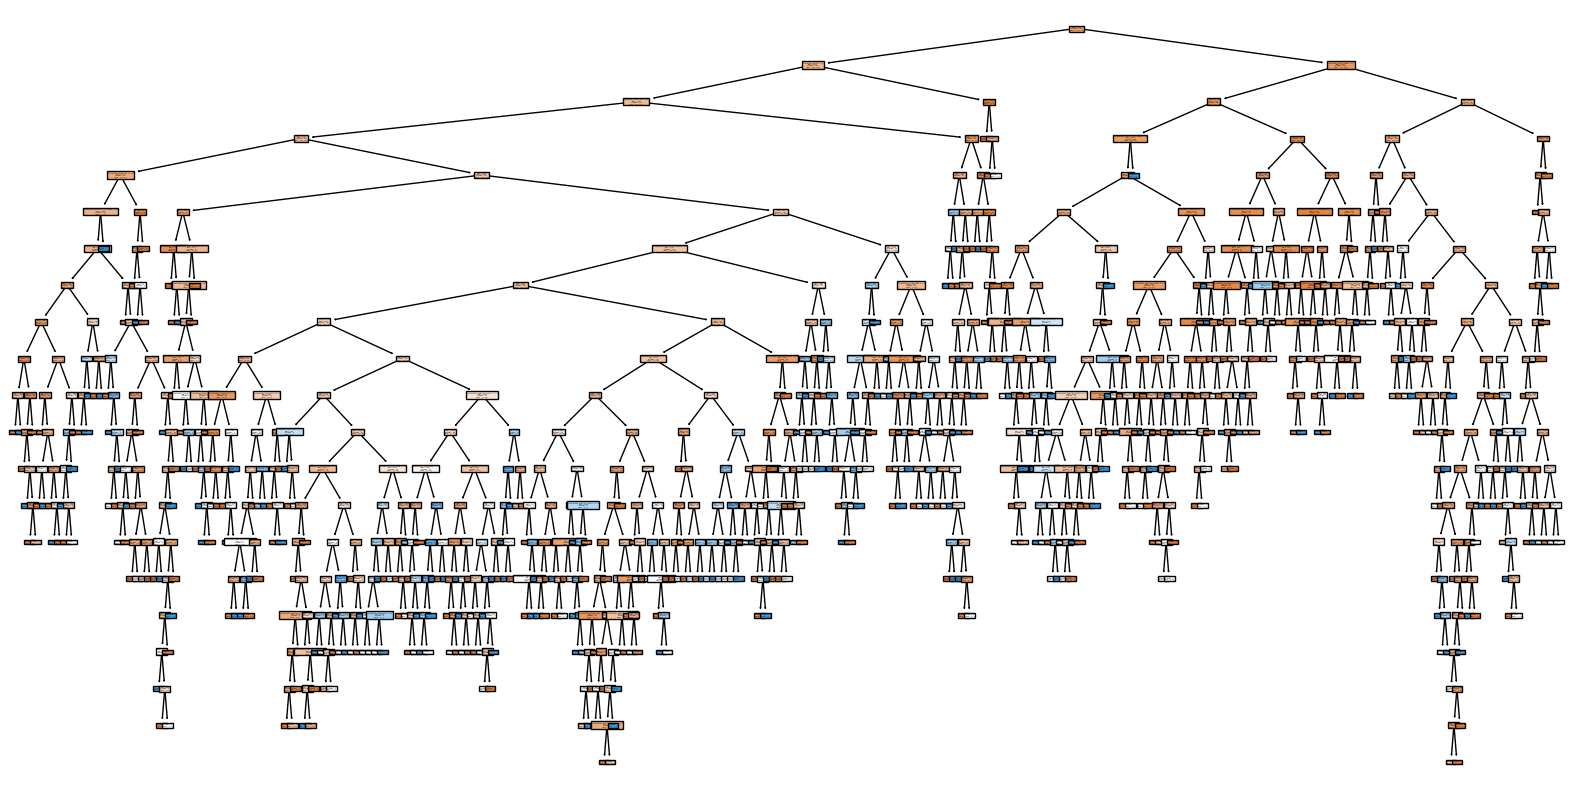

In [70]:
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()

# Check the current columns in the DataFrame
print(mcdonalds.columns)

# Convert 'Gender' to numerical values using Label Encoding
mcdonalds["Gender"] = label_encoder.fit_transform(mcdonalds["Gender"])

# Extract numeric values from the "Like" column
mcdonalds["Like_n"] = mcdonalds["Like"].str.extract('(\d+)').astype(float)

# Fill missing values with a default value (e.g., 0)
mcdonalds["Like_n"] = mcdonalds["Like_n"].fillna(0)

# Round the values if needed
mcdonalds["Like_n"] = mcdonalds["Like_n"].round().astype(int)

# Check if 'VisitFrequency' is present in the DataFrame
if "VisitFrequency" in mcdonalds.columns:
    # One-hot encode the 'VisitFrequency' column
    mcdonalds = pd.get_dummies(mcdonalds, columns=["VisitFrequency"])

# One-hot encode the 'Gender' column
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(mcdonalds[["Gender"]])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=["Female", "Male"])

# Concatenate the one-hot encoded 'Gender' column with X_tree DataFrame
X_tree = pd.concat([mcdonalds[["Like_n", "Age"] + list(mcdonalds.columns[mcdonalds.columns.str.startswith('VisitFrequency_')])], gender_encoded_df], axis=1)

y_tree = (kmeans_4_labels == 3).astype(int)

# Continue with fitting the decision tree
tree = DecisionTreeClassifier()
tree.fit(X_tree, y_tree)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree, filled=True, feature_names=X_tree.columns
)
plt.show()


# Selecting (the) Target Segment(s)

In [88]:
# visit <- tapply(as.numeric(mcdonalds$VisitFrequency),
# + k4, mean)
# visit
# Extract numeric values from the "VisitFrequency" column
# Check the current columns in the DataFrame
print(mcdonalds.columns)

# Extract numeric values from the "VisitFrequency" column if it exists
# Identify columns related to VisitFrequency
visit_frequency_columns = mcdonalds.columns[mcdonalds.columns.str.startswith('VisitFrequency_')]

# Extract numeric values from the VisitFrequency-related columns
# Convert the extracted numeric values to integers
mcdonalds["VisitFrequency_numeric"] = pd.to_numeric(mcdonalds["VisitFrequency_numeric"], errors='coerce')

# Fill missing values with a default value (e.g., 0)
mcdonalds["VisitFrequency_numeric"] = mcdonalds["VisitFrequency_numeric"].fillna(0)

# Round the values if needed
mcdonalds["VisitFrequency_numeric"] = mcdonalds["VisitFrequency_numeric"].round().astype(int)

# Continue with other calculations
like = mcdonalds.groupby(kmeans_4_labels)["Like_n"].mean()
female = mcdonalds.groupby(kmeans_4_labels)["Gender"].apply(
    lambda x: (x == "Female").mean()
)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'Gender',
       'Like_n', 'VisitFrequency_Every three months',
       'VisitFrequency_More than once a week', 'VisitFrequency_Never',
       'VisitFrequency_Once a month', 'VisitFrequency_Once a week',
       'VisitFrequency_Once a year', 'VisitFrequency_numeric'],
      dtype='object')


In [89]:
# Print the "VisitFrequency_numeric" column
print(mcdonalds["VisitFrequency_numeric"])


0       0
1       0
2       0
3       0
4       0
       ..
1448    0
1449    0
1450    0
1451    0
1452    0
Name: VisitFrequency_numeric, Length: 1453, dtype: int64


In [90]:
# Calculate mean values for 'VisitFrequency', 'Like', and 'Gender' by cluster
visit_mean = mcdonalds.groupby(kmeans_4_labels)["VisitFrequency_numeric"].mean()
like_mean = mcdonalds.groupby(kmeans_4_labels)["Like_n"].mean()
gender_mean = mcdonalds.groupby(kmeans_4_labels)["Gender"].apply(lambda x: (x == 0).mean())

In [93]:
# Display the mean values
print("Cluster\t\tVisit Frequency\tLike\t\tGender (mean of 0)\n")
for cluster in visit_mean.index:
    print(f"{cluster}\t\t{visit_mean[cluster]}\t\t{like_mean[cluster]}\t\t{gender_mean[cluster]}")


Cluster		Visit Frequency	Like		Gender (mean of 0)

0		0.0		3.0721247563352825		0.6023391812865497
1		0.0		2.2459016393442623		0.5819672131147541
2		0.0		3.0826446280991737		0.41735537190082644
3		0.0		2.5993975903614457		0.49698795180722893
